# Bayesian Fusion

## 2. Monte-Carlo Integration

In [2]:
import numpy as np
import matplotlib.pyplot as plt

$f(x)=e^{-x} + 0.001 \cos(100x)$.

Find $I = \int^1_0 f(x)dx = 1-e^{-1}+\frac{0.001}{100} \sin(100)$

In [3]:
def f(x):
    return np.exp(-x) + 0.001 * np.cos(100 * x)

I_true = 1.0 - np.exp(-1.0) + 0.001 * np.sin(100.0)/100
I_true

0.6321154951721466

In [4]:
def monte_carlo_integration(f, a, b, n, dist, pdf):
    x = dist(a, b, n)
    h = (b - a)
    y = f(x)/pdf(x)

    return np.mean(y)

In [5]:
a = 0
b = 1
sample_size = [10, 100, 1000, 10000, 100000]

### a. A uniform sampling probability density function is used

In [6]:
def uni_pdf(x):
    return 1/(b - a)

In [7]:

results_uniform = []
for n in sample_size:
    estimates = [monte_carlo_integration(f, a, b, n, np.random.uniform, uni_pdf) for i in range(100)]
    mean_estimate = np.mean(estimates)
    std_estimate = np.std(estimates)
    results_uniform.append((n, mean_estimate, std_estimate))

results_uniform

[(10, 0.6271598380280815, 0.05739818438234217),
 (100, 0.6305798152448261, 0.018742422555762327),
 (1000, 0.6319241300785505, 0.005126317284242676),
 (10000, 0.632053270655868, 0.0017521522556252509),
 (100000, 0.6321883310335513, 0.0006055193974690711)]

### b. The sampling probability distribution is $p(x)=Ae^{-x}$

The cumulative probability function (cdf) $P(x)=\int^x_{0} p(t)dt = A(1-e^{-x})$
Hence, $P^{-1} (u) = -\log(1-\frac{u}{A})$

In [8]:
A = np.exp(1)/(np.exp(1)-1)

In [9]:
def imp_pdf(x):
    return A * np.exp(-x)

def inverse_transform_sampling(a, b, n):
    u = np.random.uniform(a, b, n)
    return -np.log(1 - u/A)

In [10]:
results_importance = []
for n in sample_size:
    estimates = [monte_carlo_integration(f, a, b, n, inverse_transform_sampling, imp_pdf) for i in range(100)]
    mean_estimate = np.mean(estimates)
    std_estimate = np.std(estimates)
    results_importance.append((n, mean_estimate, std_estimate))

results_importance

[(10, 0.6321090731292847, 0.0002144566788141894),
 (100, 0.6321286940544092, 7.17117477099109e-05),
 (1000, 0.6321158100722601, 2.3965039652985527e-05),
 (10000, 0.6321136606918695, 7.162805844464125e-06),
 (100000, 0.6321155591869104, 2.3609982831372513e-06)]

In [11]:
def combined_plot_results(results_uni, results_imp, title):
    sample_sizes, mean_values, std_dev_values = zip(*results_uni)
    sample_sizes_imp, mean_values_imp, std_dev_values_imp = zip(*results_imp)
    plt.figure()
    plt.errorbar(sample_sizes, mean_values, yerr=std_dev_values,
                 fmt='o-', label='Uniform Sampling')
    plt.errorbar(sample_sizes_imp, mean_values_imp, yerr=std_dev_values_imp,
                 fmt='x-', label='Importance Sampling')
    plt.axhline(y=I_true, color='r',
                linestyle='--', label='Theoretical')

    plt.xscale('log')
    plt.xlabel('Sample Size (log scale)')
    plt.ylabel('Integral Estimate')
    plt.title(title)
    plt.legend()
    plt.show()

def individual_plot_results(results, title):
    sample_sizes, mean_values, std_dev_values = zip(*results)

    plt.figure()
    plt.errorbar(sample_sizes, mean_values, yerr=std_dev_values,
                 fmt='o-', label='Monte-Carlo')

    plt.axhline(y=I_true, color='r',
                linestyle='--', label='Theoretical')

    plt.xscale('log')
    plt.xlabel('Sample Size (log scale)')
    plt.ylabel('Integral Estimate')
    plt.title(title)
    plt.legend()
    plt.show()

def std_plot_comparison(results_uni, results_imp, title):
    sample_sizes, mean_values, std_dev_values = zip(*results_uni)
    sample_sizes_imp, mean_values_imp, std_dev_values_imp = zip(*results_imp)
    plt.figure()
    plt.plot(sample_sizes, std_dev_values, 'o-', label='Uniform Sampling')
    plt.plot(sample_sizes_imp, std_dev_values_imp, 'x-', label='Importance Sampling')

    plt.xscale('log')
    plt.xlabel('Sample Size (log scale)')
    plt.ylabel('Standard Deviation Estimate')
    plt.title(title)
    plt.legend()
    plt.show()

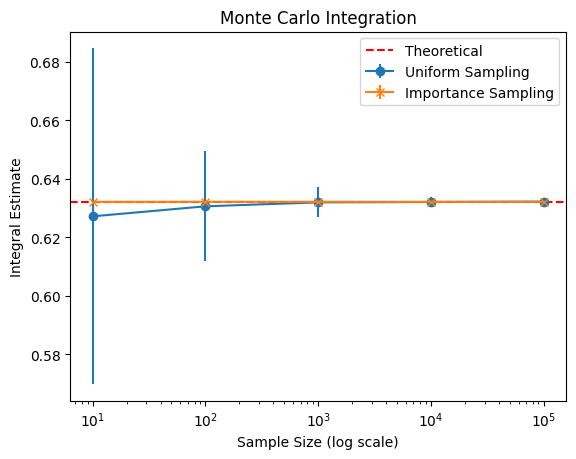

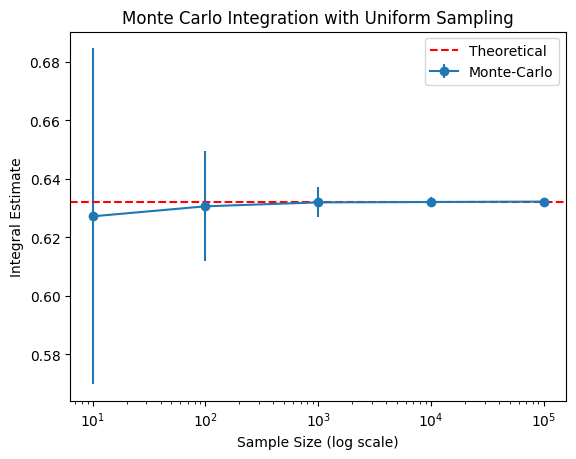

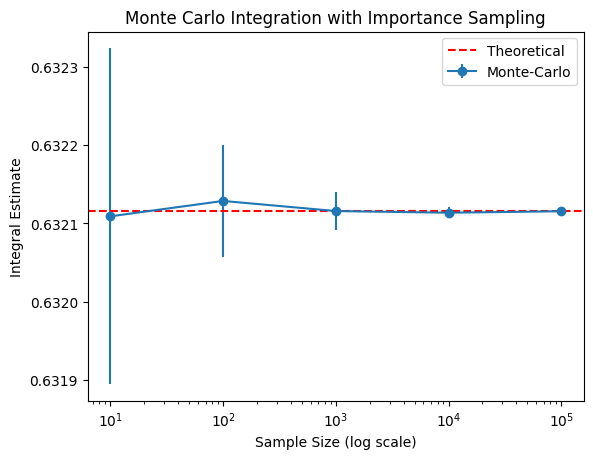

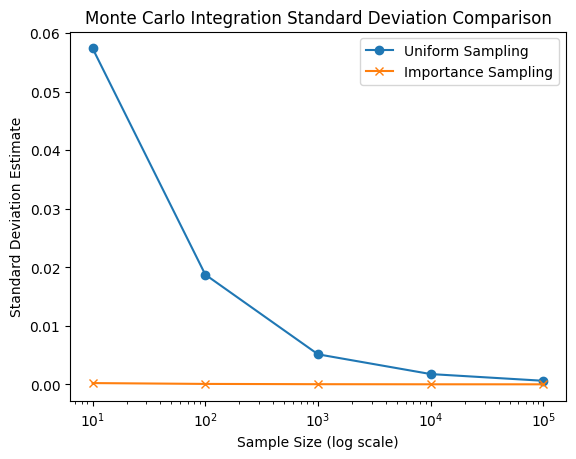

In [12]:
combined_plot_results(results_uniform, results_importance,
             'Monte Carlo Integration')
individual_plot_results(results_uniform,
             'Monte Carlo Integration with Uniform Sampling')
individual_plot_results(results_importance,
             'Monte Carlo Integration with Importance Sampling')
std_plot_comparison(results_uniform, results_importance,
             'Monte Carlo Integration Standard Deviation Comparison')
# plot_results(results_importance,
#              'Monte Carlo Integration with Importance Sampling')

### 4.	Provide a sampling implementation for the given probability density function using the reject method (a) and the Metropolis-Hastings algorithm (b).


$f(x) = \frac{p(x)}{\int^{\infty}_{-\infty} p(x')dx'}$ where  $p(x) = e^{-x^2} (2+\sin(5x)+sin(2x))$

In [13]:
from scipy.integrate import quad

# Define the unnormalized probability density function p(x)


def p(x):
    return np.exp(-x**2) * (2 + np.sin(5*x) + np.sin(2*x))


# Integrate p(x) over its entire domain to find the normalization constant C
C, _ = quad(p, -np.inf, np.inf)
C

3.5449077018110318

In [15]:
def f(x):
    return p(x) / C


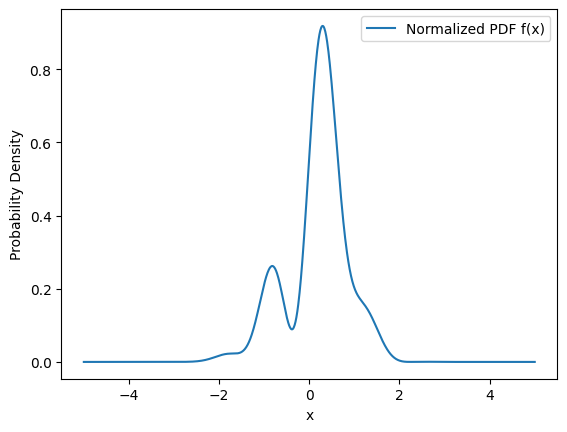

In [23]:
x_vals = np.linspace(-5, 5, 1000)
p_vals = p(x_vals)
f_vals = f(x_vals)

# plt.plot(x_vals, p_vals, label='Unnormalized PDF p(x)')
plt.plot(x_vals, f_vals, label='Normalized PDF f(x)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### a. Rejection Method

This method involves sampling from a proposal distribution and accept or reject the sample based on comparison with the ratio of the target pdf to the proposal pdf.

Here we assume the proposal distribution to be gaussian.


In [30]:
def q(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)

ratio = lambda x: f(x) / q(x, mu=0, sigma=1)

In [31]:
def rejection_sampling(n):
    samples = []
    for _ in range(n):
        x = np.random.normal(loc=0, scale=1) # sample from q
        u = np.random.uniform(0, 1)
        if u < ratio(x): # accept or reject samples based on the ratio
            samples.append(x)
    return np.array(samples)

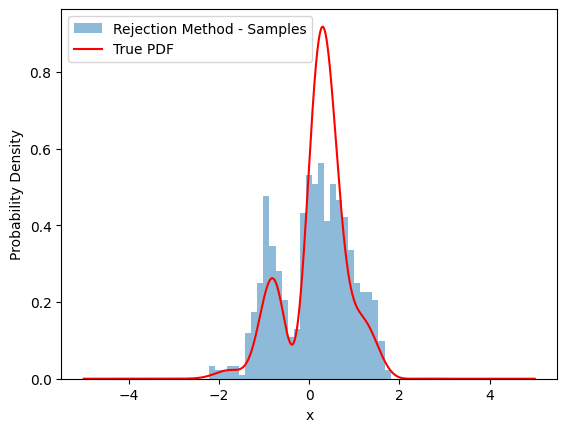

In [32]:
num_samples = 1000
samples_rejection = rejection_sampling(num_samples)

# Plot the histogram of accepted samples
plt.hist(samples_rejection, bins=30, density=True,
         alpha=0.5, label='Rejection Method - Samples')

# Plot the true PDF for comparison
x_vals = np.linspace(-5, 5, 1000)
plt.plot(x_vals, f(x_vals), 'r-', label='True PDF')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

The efficiency of the rejection method depends on the choice of the proposal distribution. In practice, choosing an efficient proposal distribution is crucial for the success of the rejection method

### b. Metropolis-Hasting Algorithm 

In [28]:
def q(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)

def sample_q(x, sigma):
    return np.random.normal(loc=x, scale=sigma)

def ratio(x, x_new, sigma):
    return min(1, f(x_new) * q(x, x_new, sigma) / (f(x) * q(x_new, x, sigma)))

def metropolis_hastings(n, sigma):
    samples = []
    x = 0
    for _ in range(n):
        x_new = sample_q(x, sigma)
        u = np.random.uniform(0, 1)
        if u < ratio(x, x_new, sigma):
            x = x_new
        samples.append(x)
    return np.array(samples)

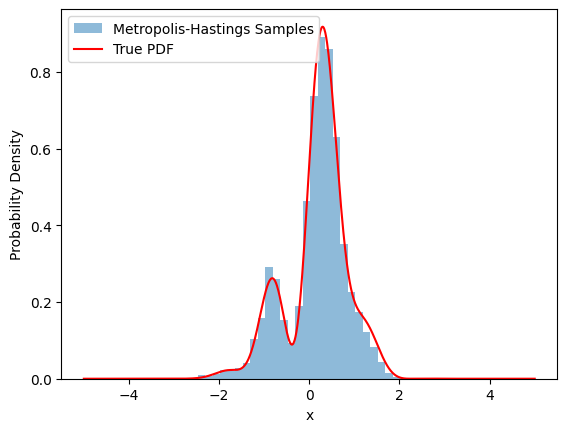

In [29]:
num_samples = 10000
proposal_sigma = 0.5
samples_mh = metropolis_hastings(num_samples, proposal_sigma)

# Plot the histogram of samples
plt.hist(samples_mh, bins=30, density=True, alpha=0.5,
         label='Metropolis-Hastings Samples')

# Plot the true PDF for comparison
x_vals = np.linspace(-5, 5, 1000)
plt.plot(x_vals, f(x_vals), 'r-', label='True PDF')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()